(5793, 6)

=== Accuracy ===
50.52%

=== Confusion Matrix ===
[[ 870  555]
 [1378 1104]]


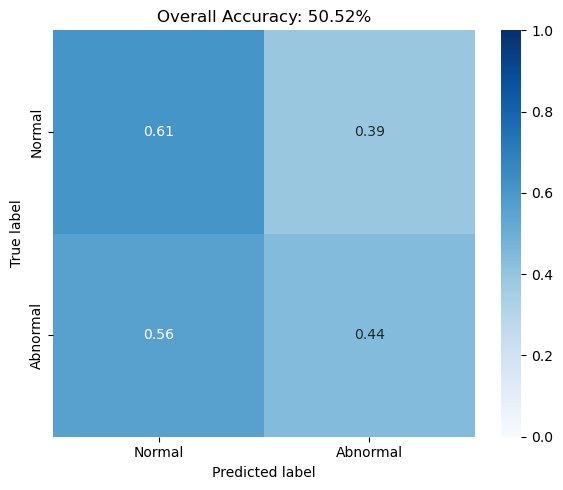

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# 1) データ読み込み・前処理
home_directory    = os.path.expanduser('~')
onedrive_folder   = 'OneDrive'
file_path         = os.path.join(home_directory, onedrive_folder, 'CODES', 'samples', 'engine_data.csv')
df                = pd.read_csv(file_path).dropna()

# 特徴量 / ラベル
X = df.drop(columns=['Engine Condition']).values
y = df['Engine Condition'].values  # 0=Normal, 1=Abnormal

# 標準化
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) 学習/評価データ分割
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=True
)

# 3) One-Class SVM 用の「正常データのみ」を切り出し
X_train_normal = X_train[y_train == 0]
print(X_train_normal.shape)

# 4) モデル定義・学習
ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.4)
ocsvm.fit(X_train_normal)


#5) テストセットに対する異常スコア／予測
#predict() は +1: inlier (normal), -1: outlier (anomaly)
y_pred_ocsvm = ocsvm.predict(X_test)
# 0=Normal, 1=Abnormal の形式に変換
y_pred = np.where(y_pred_ocsvm == 1, 0, 1)

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1, keepdims=True)
acc = accuracy_score(y_test, y_pred) * 100  # %

print(f"\n=== Accuracy ===\n{acc:.2f}%")
print("\n=== Confusion Matrix ===")
print(cm)

# ② ヒートマップで可視化
class_names = ['Normal', 'Abnormal']
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_normalized,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    vmin=0.0,
    vmax=1.0
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title(f"Overall Accuracy: {acc:.2f}%")
plt.tight_layout()
plt.show()
